In [4]:
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

This is a dog
This is a cat
This is a dog
This is a cat
This is a cat
This is a cat
This is a dog


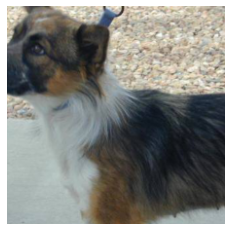

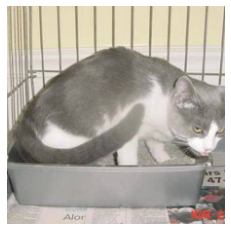

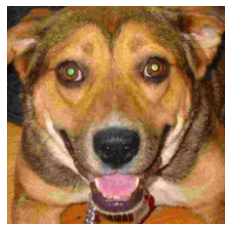

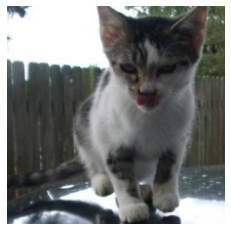

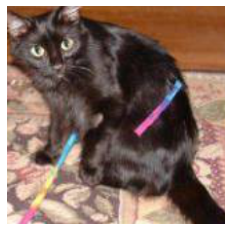

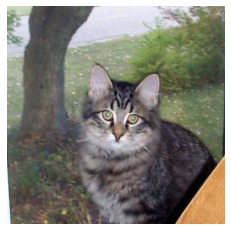

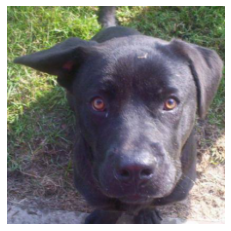

In [6]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()
                               ])
train_dataset = datasets.ImageFolder('./processed_data/train', transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder('./processed_data/test', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

for images, labels in train_dataloader:
    if (labels[0] == 1):
        print("This is a dog")
    else:
        print("This is a cat")
    imshow(images[0], normalize=False)
    # break